# Global Solutions 4 - Pegada de Carbono

## Abstract
Este projeto tem como objetivo analisar a pegada de carbono (emissões de CO₂) das nações, com foco principal no Brasil. A análise inclui comparações com outros países, como Estados Unidos e nações da OCDE, e com os valores globais. Utilizando dados históricos de emissões, investigamos as tendências, identificamos os anos com políticas climáticas relevantes e exploramos a relação entre as emissões e o crescimento populacional. Aplicamos modelos de aprendizado de máquina (ML) para previsão e categorização das emissões. Este trabalho visa apresentar insights acionáveis para entender melhor os impactos ambientais e subsidiar políticas públicas eficazes.

## Alunos
- **Pedro Oliveira Valotto** - RM: 551445  
- **Rony Ken Nagai** - RM: 551549  
- **Tomáz Versolato Carballo** - RM: 551417

---


### Importação das Bibliotecas
#### O que será feito:
1. Importar as bibliotecas necessárias para manipulação, análise de dados, visualização de gráficos e implementação de modelos de aprendizado de máquina.
2. As principais bibliotecas utilizadas são:
   - **Pandas**: Manipulação e análise de dados.
   - **Matplotlib** e **Seaborn**: Criação de gráficos e visualizações avançadas.
   - **Scikit-learn**: Implementação de modelos de aprendizado de máquina e métricas de avaliação.

#### Código:

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, classification_report


#### Observações:
- As bibliotecas importadas são fundamentais para a análise exploratória de dados e a modelagem preditiva.
- A utilização conjunta dessas ferramentas garante uma abordagem eficiente e integrada ao projeto.

---

### Carregamento e Preparação dos Datasets
#### O que será feito:
1. **Carregar os datasets**:
   - `annual-co2-emissions-per-country.csv` contém dados globais de emissões de CO₂.
   - `export_emissions.csv` fornece informações adicionais para análise.
2. **Limpeza e Mapeamento**:
   - O segundo dataset será limpo e as colunas de interesse serão renomeadas para facilitar a manipulação.
3. **Seleção de Dados Relevantes**:
   - Seleção de países específicos: Brasil, Global, Estados Unidos, OCDE e Continente Americano.
4. **Transformação para Formato Longo**:
   - Converter os dados em um formato mais adequado para análise (colunas de países agrupadas em uma única coluna `Country`).
5. **Preparação do Primeiro Dataset**:
   - Renomear colunas para padronizar os nomes.

#### Código:

In [74]:
dataset_1 = pd.read_csv('annual-co2-emissions-per-country.csv')
dataset_2 = pd.read_csv('export_emissions.csv')

dataset_2_cleaned = dataset_2.iloc[1:].reset_index(drop=True)
dataset_2_cleaned.columns = ['Year'] + dataset_2_cleaned.iloc[0, 1:].tolist()
dataset_2_cleaned = dataset_2_cleaned[1:]

country_mapping = {8: 'Brazil', 11: 'Global', 18: 'United States', 37: 'OECD', 43: 'Americas'}
columns_to_keep = [0] + list(country_mapping.keys())
dataset_mapped = dataset_2_cleaned.iloc[:, columns_to_keep]
dataset_mapped.columns = ['Year'] + [country_mapping[idx] for idx in country_mapping]

dataset_mapped_long = pd.melt(
    dataset_mapped,
    id_vars=['Year'],
    var_name='Country',
    value_name='Emissions'
)

dataset_1_cleaned = dataset_1.rename(columns={
    'Entity': 'Country',
    'Annual CO₂ emissions': 'Annual Emissions'
})


#### Observações:
- O carregamento e limpeza dos dados são passos cruciais para garantir que os datasets estejam prontos para análise.
- O mapeamento dos países e a transformação para formato longo permitem uma análise mais estruturada e flexível.
- O `dataset_1` e o `dataset_2` serão combinados em etapas futuras para integrar informações de diferentes fontes.

---

### Combinação e Verificação dos Datasets
#### O que será feito:
1. **Harmonização de Colunas `Year`**:
   - Garantir que as colunas `Year` de ambos os datasets estejam no mesmo formato (numérico) para permitir a combinação.
   - Utilizamos `pd.to_numeric` para corrigir possíveis inconsistências nos valores.
2. **Combinação dos Datasets**:
   - Combinar os dados do primeiro dataset (`dataset_1_cleaned`) com o segundo dataset (`dataset_mapped_long`) utilizando as colunas `Year` e `Country` como chaves.
   - A operação de merge é realizada com a opção `inner` para incluir apenas os dados correspondentes nos dois datasets.
3. **Verificação do Dataset Combinado**:
   - Exibir as primeiras linhas do dataset combinado para assegurar que a operação foi bem-sucedida.

#### Código:

In [75]:
dataset_1_cleaned['Year'] = pd.to_numeric(dataset_1_cleaned['Year'], errors='coerce')
dataset_mapped_long['Year'] = pd.to_numeric(dataset_mapped_long['Year'], errors='coerce')

combined_dataset = pd.merge(
    dataset_1_cleaned[['Year', 'Country', 'Annual Emissions']],
    dataset_mapped_long,
    on=['Year', 'Country'],
    how='inner'
)

print(combined_dataset.head())

   Year Country  Annual Emissions Emissions
0  1961  Brazil        49136050.0   51.1267
1  1962  Brazil        53613250.0   53.6401
2  1963  Brazil        55523040.0   50.0327
3  1964  Brazil        56626316.0     55.67
4  1965  Brazil        56279224.0   58.8048



#### Observações:
- A combinação dos datasets permite integrar informações de emissões totais e específicas para países selecionados.
- A verificação dos dados combinados é essencial para garantir que o processo foi realizado corretamente, evitando duplicações ou perdas de dados importantes.
- Este passo consolida os dados em um formato único e pronto para análise posterior.

---

### Pergunta 1: Como as emissões de CO₂ do Brasil evoluíram ao longo dos anos?

#### O que será feito:
1. Filtrar os dados para incluir apenas o Brasil a partir do dataset combinado.
2. Criar um gráfico de linha para visualizar a evolução das emissões anuais de CO₂ no Brasil ao longo do tempo.
3. Adicionar rótulos aos eixos, título e grade para facilitar a interpretação.

#### Código:

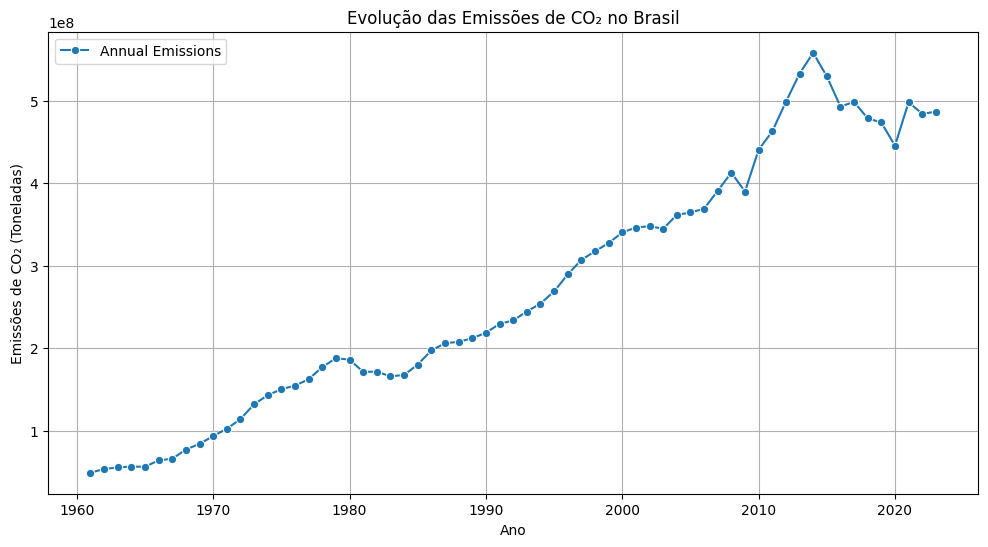

In [76]:
brazil_data = combined_dataset[combined_dataset['Country'] == 'Brazil']
plt.figure(figsize=(12, 6))
sns.lineplot(data=brazil_data, x='Year', y='Annual Emissions', label='Annual Emissions', marker='o')
plt.title("Evolução das Emissões de CO₂ no Brasil")
plt.xlabel("Ano")
plt.ylabel("Emissões de CO₂ (Toneladas)")
plt.grid(True)
plt.show()


#### Observações:
- O gráfico de linha permite identificar tendências de crescimento ou redução nas emissões ao longo dos anos.
- A análise ajuda a compreender o impacto de fatores como industrialização, políticas ambientais e mudanças no uso da terra no Brasil.
- Essa visualização servirá de base para comparações com outros países e regiões em perguntas futuras.

---

### Pergunta 2: Qual a diferença percentual entre as emissões de CO₂ do Brasil e as globais por década?

#### O que será feito:
1. **Corrigir e atualizar os nomes dos países**:
   - No primeiro dataset, substituir "World" por "Global" para padronizar os nomes.
   - Atualizar o dataset combinado para refletir essa alteração.
2. **Agrupar dados por década**:
   - Criar uma nova coluna `Decade` para agrupar os dados em intervalos de 10 anos.
   - Calcular a média das emissões anuais de CO₂ para o Brasil e para os valores globais.
3. **Calcular a diferença percentual**:
   - Determinar a diferença percentual entre as emissões do Brasil e as emissões globais por década.
4. **Visualizar os resultados**:
   - Criar um gráfico de barras para mostrar as diferenças percentuais por década.
   - Adicionar título, rótulos aos eixos e grade para facilitar a interpretação.

#### Código:

<ipython-input-77-ca87ce94f615>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=decade_group.index, y=decade_group['Percent_Diff'], palette='coolwarm')


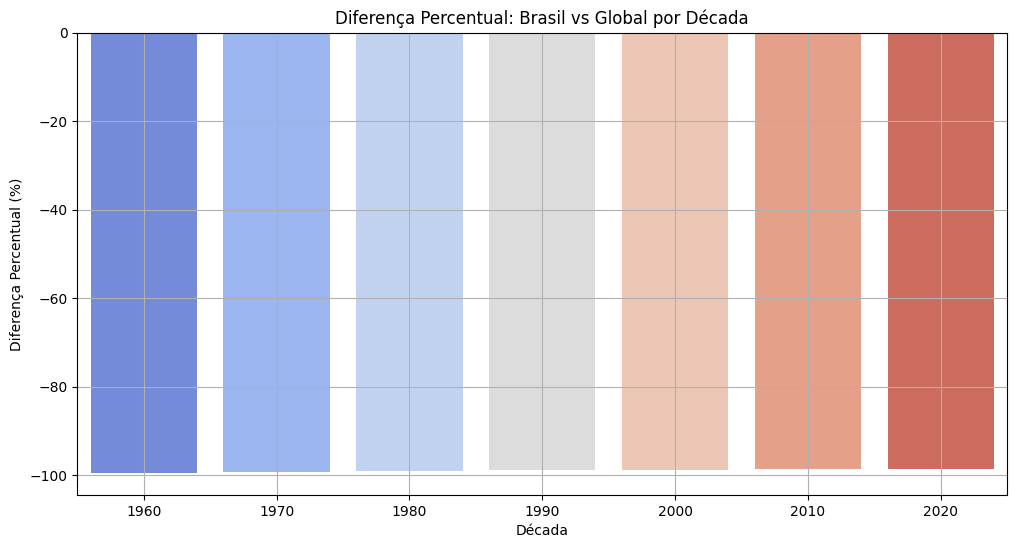

In [77]:
dataset_1_cleaned['Country'] = dataset_1_cleaned['Country'].replace({'World': 'Global'})

combined_dataset = pd.merge(
    dataset_1_cleaned[['Year', 'Country', 'Annual Emissions']],
    dataset_mapped_long,
    on=['Year', 'Country'],
    how='inner'
)

combined_dataset['Country'] = combined_dataset['Country'].str.strip().str.title()

combined_dataset['Decade'] = (combined_dataset['Year'] // 10) * 10
decade_group = combined_dataset[combined_dataset['Country'].isin(['Brazil', 'Global'])].groupby(
    ['Decade', 'Country']
)['Annual Emissions'].mean().unstack()

if 'Brazil' in decade_group.columns and 'Global' in decade_group.columns:
    decade_group['Percent_Diff'] = ((decade_group['Brazil'] - decade_group['Global']) / decade_group['Global']) * 100

    plt.figure(figsize=(12, 6))
    sns.barplot(x=decade_group.index, y=decade_group['Percent_Diff'], palette='coolwarm')
    plt.title("Diferença Percentual: Brasil vs Global por Década")
    plt.xlabel("Década")
    plt.ylabel("Diferença Percentual (%)")
    plt.grid(True)
    plt.show()
else:
    print("Os dados para 'Brazil' ou 'Global' não estão disponíveis na análise por década.")



#### Observações:
- A análise por década ajuda a identificar mudanças de longo prazo nas emissões do Brasil em comparação com os valores globais.
- O gráfico de barras é ideal para visualizar as diferenças percentuais, destacando décadas em que as emissões do Brasil divergem significativamente das emissões globais.
- Caso os dados de `Brazil` ou `Global` não estejam disponíveis, o código exibe uma mensagem informativa.

---

### Pergunta 3: Quais regiões apresentaram as maiores taxas de crescimento ou redução nas emissões de CO₂?

#### O que será feito:
1. **Analisar o crescimento das emissões**:
   - Comparar a variação percentual das emissões de CO₂ ao longo do tempo para regiões e países de interesse: Brasil, Global, Estados Unidos, OCDE e Américas.
2. **Cálculo da taxa de crescimento**:
   - Calcular a taxa de crescimento relativa para cada país/região usando a fórmula:
     \[
     \text{Taxa de Crescimento (\%)} = \frac{\text{Emissões Finais} - \text{Emissões Iniciais}}{\text{Emissões Iniciais}} \times 100
     \]
3. **Visualizar os resultados**:
   - Criar um gráfico de barras para comparar as taxas de crescimento entre as regiões.
   - Utilizar uma paleta de cores intuitiva (`viridis`) para destacar as diferenças.

#### Código:

<ipython-input-78-c86db4ff1bce>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  growth_rates = growth_data.groupby('Country').apply(
<ipython-input-78-c86db4ff1bce>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=growth_rates, x='Country', y='Growth Rate', palette='viridis')


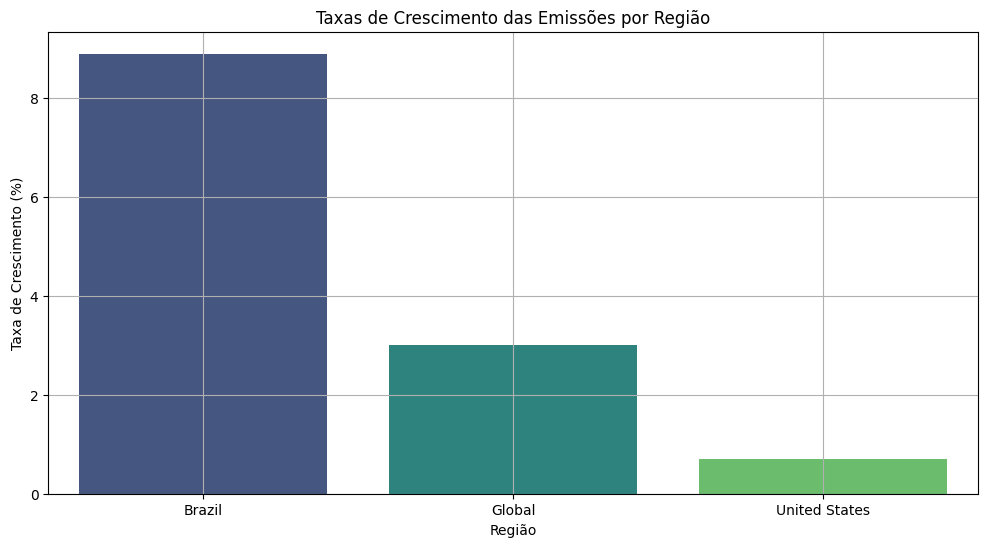

In [78]:
# Pergunta 3: Taxas de crescimento das emissões por região
countries_of_interest = ['Brazil', 'Global', 'United States', 'OECD', 'Americas']
growth_data = combined_dataset[combined_dataset['Country'].isin(countries_of_interest)]
growth_rates = growth_data.groupby('Country').apply(
    lambda x: (x['Annual Emissions'].iloc[-1] - x['Annual Emissions'].iloc[0]) / x['Annual Emissions'].iloc[0]
).reset_index(name='Growth Rate')
plt.figure(figsize=(12, 6))
sns.barplot(data=growth_rates, x='Country', y='Growth Rate', palette='viridis')
plt.title("Taxas de Crescimento das Emissões por Região")
plt.xlabel("Região")
plt.ylabel("Taxa de Crescimento (%)")
plt.grid(True)
plt.show()


#### Observações:
- O gráfico ajuda a identificar quais regiões tiveram aumentos ou reduções significativas nas emissões ao longo do período analisado.
- A análise permite destacar tendências específicas, como o impacto de políticas ambientais ou mudanças econômicas em diferentes regiões.
- Essa questão fornece uma visão clara sobre o desempenho de cada região em relação às emissões de CO₂, sendo útil para orientar políticas públicas e estratégias de mitigação.

---

### Pergunta 4: Existe uma correlação entre as emissões de CO₂ do Brasil e as emissões globais?

#### O que será feito:
1. **Explorar a relação entre as emissões do Brasil e as globais**:
   - Comparar os valores de emissões anuais do Brasil e as emissões globais para identificar se existe uma correlação entre eles.
2. **Transformação dos dados**:
   - Reorganizar os dados em um formato de tabela pivotada, onde cada linha representa um ano e as colunas representam as emissões de `Brazil` e `Global`.
3. **Visualizar a correlação**:
   - Criar um gráfico de dispersão para observar a relação entre as emissões do Brasil e as globais.
   - Adicionar uma linha de tendência usando regressão linear para indicar o grau de correlação.

#### Código:

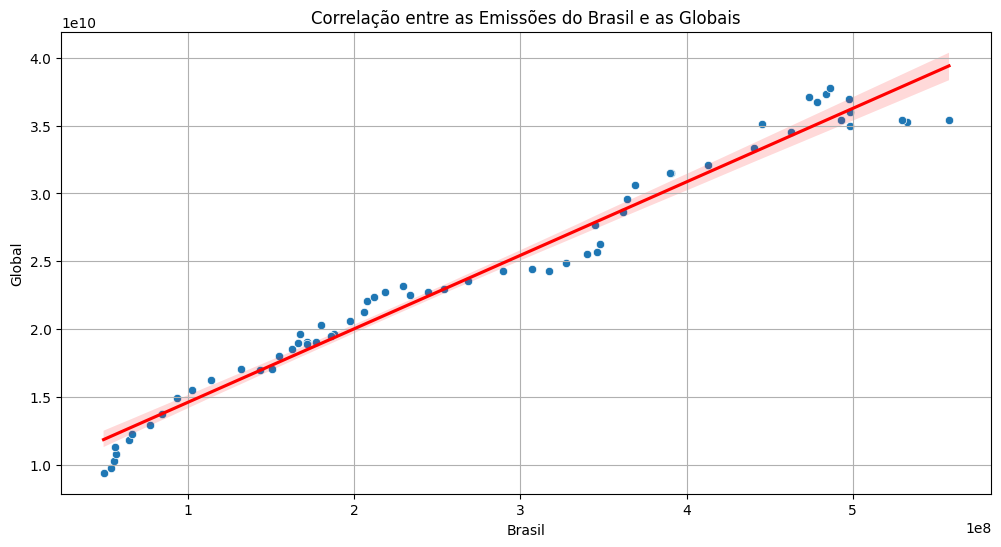

In [79]:
# Pergunta 4: Correlação entre Brasil e Global
brazil_global_corr = combined_dataset[combined_dataset['Country'].isin(['Brazil', 'Global'])]
brazil_global_corr = brazil_global_corr.pivot(index='Year', columns='Country', values='Annual Emissions')
plt.figure(figsize=(12, 6))
sns.scatterplot(data=brazil_global_corr, x='Brazil', y='Global')
sns.regplot(data=brazil_global_corr, x='Brazil', y='Global', scatter=False, color='red')
plt.title("Correlação entre as Emissões do Brasil e as Globais")
plt.xlabel("Brasil")
plt.ylabel("Global")
plt.grid(True)
plt.show()


#### Observações:
- O gráfico de dispersão ajuda a identificar padrões, como o impacto das emissões do Brasil no total global ou possíveis desvios de tendência.
- A linha de regressão destaca se a relação é positiva (aumento do Brasil acompanha aumento global) ou inexistente.
- Esta análise pode fornecer insights sobre o papel do Brasil no cenário global de emissões e sua contribuição relativa às mudanças climáticas.

---

### Pergunta 5: As emissões de CO₂ do Brasil estão abaixo da média global?

#### O que será feito:
1. **Calcular a média global**:
   - Determinar a média das emissões globais de CO₂ para comparar com as emissões do Brasil.
2. **Visualizar a distribuição das emissões do Brasil**:
   - Criar um histograma das emissões anuais do Brasil, com suavização (KDE) para destacar a densidade.
   - Adicionar uma linha vertical para representar a média global.
3. **Analisar o gráfico**:
   - Usar escala logarítmica no eixo X, se necessário, para melhorar a visualização de valores discrepantes.
   - Destacar claramente a diferença entre a distribuição das emissões do Brasil e a média global.

#### Código:

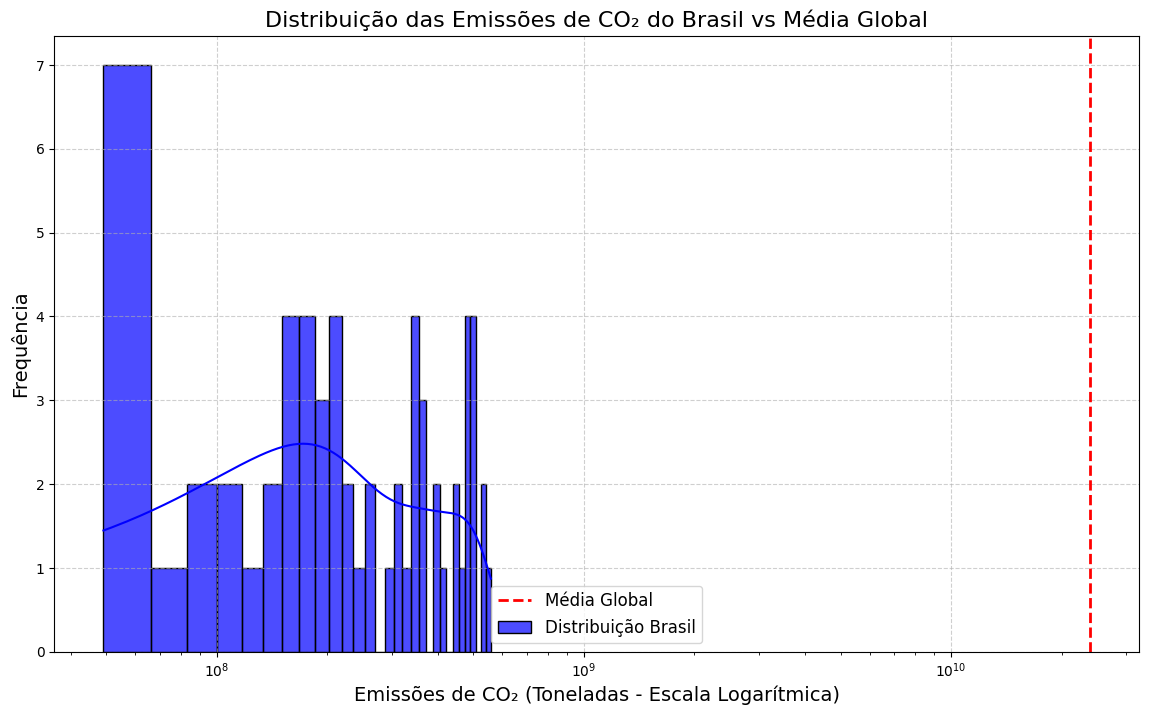

In [80]:
global_mean = combined_dataset[combined_dataset['Country'] == 'Global']['Annual Emissions'].mean()

plt.figure(figsize=(14, 8))

sns.histplot(
    data=combined_dataset[combined_dataset['Country'] == 'Brazil'],
    x='Annual Emissions',
    kde=True,
    color='blue',
    bins=30,
    alpha=0.7,
    label='Distribuição Brasil'
)

plt.axvline(global_mean, color='red', linestyle='--', linewidth=2, label='Média Global')

plt.title("Distribuição das Emissões de CO₂ do Brasil vs Média Global", fontsize=16)
plt.xlabel("Emissões de CO₂ (Toneladas)", fontsize=14)
plt.ylabel("Frequência", fontsize=14)

if combined_dataset['Annual Emissions'].max() > 1e6:
    plt.xscale('log')
    plt.xlabel("Emissões de CO₂ (Toneladas - Escala Logarítmica)", fontsize=14)

plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()


#### Observações:
- O histograma mostra como as emissões do Brasil estão distribuídas ao longo do tempo, permitindo identificar períodos de alta ou baixa emissão.
- A linha representando a média global facilita a comparação direta e ajuda a identificar se as emissões do Brasil estão consistentemente abaixo ou acima da média global.
- O uso da escala logarítmica melhora a visualização em casos de grandes diferenças nos valores de emissões.
- Este gráfico fornece um ponto de partida para discutir o papel do Brasil em relação às emissões globais e seu impacto no cenário ambiental.

---

### Pergunta 6: Como as emissões de CO₂ do Brasil flutuam em relação aos EUA e à OCDE?

#### O que será feito:
1. **Selecionar os dados para comparação**:
   - Focar nas emissões anuais de CO₂ do Brasil, Estados Unidos e OCDE.
2. **Criar um gráfico de linha**:
   - Comparar as emissões de CO₂ ao longo dos anos para os três países/regiões.
3. **Destacar a diferença entre Brasil e EUA**:
   - Preencher a área entre as emissões do Brasil e dos EUA para destacar a lacuna (gap) entre as duas regiões.
4. **Adicionar elementos visuais informativos**:
   - Usar rótulos, legenda e grade para facilitar a interpretação do gráfico.

#### Código:

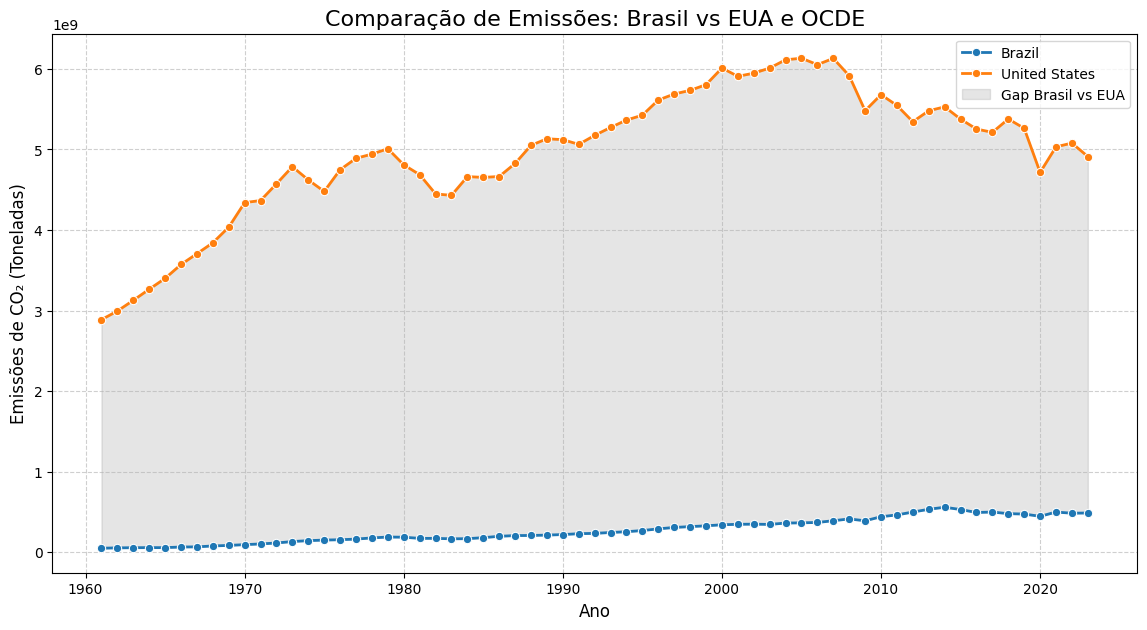

In [81]:
comparison_data = combined_dataset[combined_dataset['Country'].isin(['Brazil', 'United States', 'OECD'])]

plt.figure(figsize=(14, 7))
sns.lineplot(data=comparison_data, x='Year', y='Annual Emissions', hue='Country', marker='o', linewidth=2)
plt.fill_between(
    comparison_data['Year'].unique(),
    comparison_data[comparison_data['Country'] == 'Brazil']['Annual Emissions'],
    comparison_data[comparison_data['Country'] == 'United States']['Annual Emissions'],
    color='gray', alpha=0.2, label='Gap Brasil vs EUA'
)
plt.title("Comparação de Emissões: Brasil vs EUA e OCDE", fontsize=16)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Emissões de CO₂ (Toneladas)", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


#### Observações:
- O gráfico de linha mostra claramente as tendências de emissões para cada país/região, permitindo identificar padrões específicos, como crescimento ou estabilização.
- A área sombreada entre Brasil e EUA destaca visualmente a diferença de emissões, evidenciando as disparidades.
- Essa análise ajuda a contextualizar o papel do Brasil em relação às nações com maiores emissões, como os EUA, e aos blocos econômicos, como a OCDE.
- Pode servir como base para discussões sobre políticas climáticas diferenciadas e responsabilidades ambientais globais.

---

### Pergunta 7: Quais são as previsões para as emissões de CO₂ do Brasil nos próximos 10 anos?

#### O que será feito:
1. **Preparar os dados históricos do Brasil**:
   - Selecionar os dados de emissões do Brasil e remover valores ausentes.
2. **Treinar um modelo de Regressão Linear**:
   - Dividir os dados históricos em conjuntos de treino e teste.
   - Usar o modelo de Regressão Linear para identificar a tendência das emissões ao longo do tempo.
3. **Prever as emissões futuras**:
   - Gerar previsões para os próximos 10 anos (2025-2034).
4. **Visualizar as previsões**:
   - Criar um gráfico de dispersão para os dados reais.
   - Adicionar a linha de previsão (2025-2034) e a linha de tendência ajustada para os dados históricos.

#### Código:

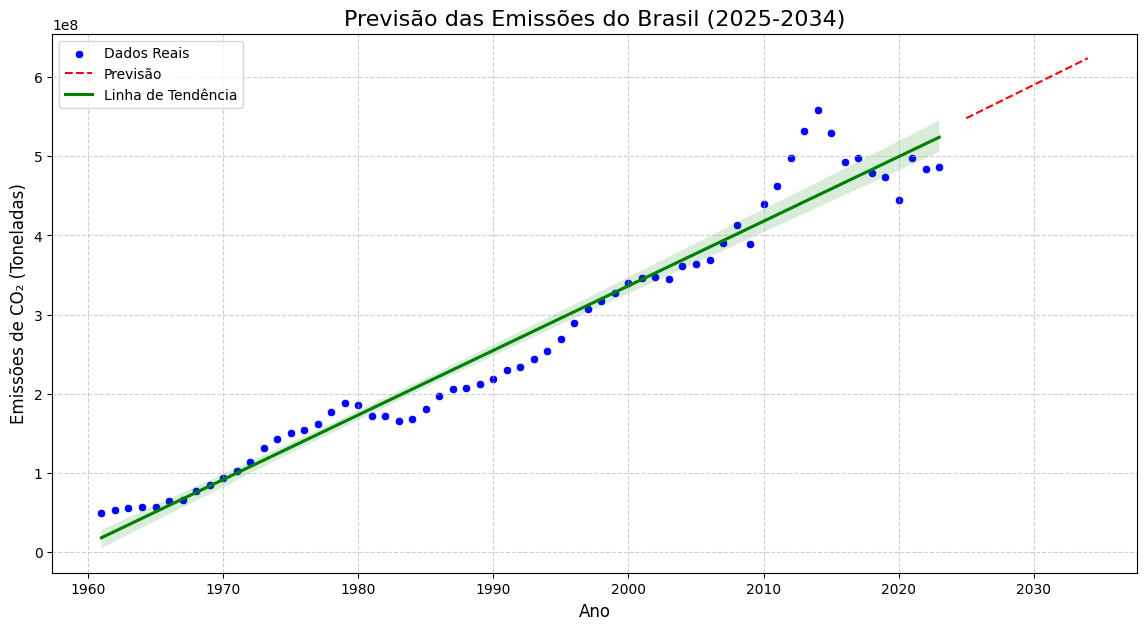

In [82]:
# Pergunta 7: Previsão das emissões do Brasil para os próximos 10 anos
brazil_regression_data = brazil_data[['Year', 'Annual Emissions']].dropna()
X_brazil = brazil_regression_data[['Year']]
y_brazil = brazil_regression_data['Annual Emissions']

# Dividir os dados em treino e teste
X_train_brazil, X_test_brazil, y_train_brazil, y_test_brazil = train_test_split(X_brazil, y_brazil, test_size=0.3, random_state=42)

# Regressão Linear
brazil_model = LinearRegression()
brazil_model.fit(X_train_brazil, y_train_brazil)

# Prever os próximos 10 anos
future_years = pd.DataFrame({'Year': range(2025, 2035)})
future_predictions = brazil_model.predict(future_years)

# Gráfico de previsão
plt.figure(figsize=(14, 7))
sns.scatterplot(data=brazil_regression_data, x='Year', y='Annual Emissions', color='blue', label='Dados Reais')
sns.lineplot(x=future_years['Year'], y=future_predictions, color='red', linestyle='--', label='Previsão')
sns.regplot(data=brazil_regression_data, x='Year', y='Annual Emissions', scatter=False, color='green', label='Linha de Tendência')
plt.title("Previsão das Emissões do Brasil (2025-2034)", fontsize=16)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Emissões de CO₂ (Toneladas)", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


#### Observações:
- O gráfico combina dados históricos e projeções futuras, ajudando a entender a direção potencial das emissões de CO₂ do Brasil.
- A linha de previsão destaca o impacto esperado de fatores atuais, como políticas ambientais e mudanças econômicas.
- Essa análise pode servir de base para estratégias de mitigação e adaptação climática, orientando tomadas de decisão nos próximos anos.
- O modelo de Regressão Linear é simples e interpretável, mas pode ser complementado com outros métodos mais complexos para maior precisão.

---

### Pergunta 8: Como os países podem ser categorizados em níveis de emissões de CO₂?

#### O que será feito:
1. **Classificação de países por níveis de emissões**:
   - Categorizar os países em dois níveis: `High` (emissões acima da média) e `Low` (emissões abaixo da média).
   - Contar a quantidade de países em cada categoria.
2. **Preparação para visualização avançada**:
   - Calcular o percentual de países em cada categoria.
   - Criar rótulos informativos que incluem a quantidade de países e a porcentagem relativa.
3. **Visualização com Treemap**:
   - Usar um gráfico de Treemap para representar visualmente a proporção entre as categorias.
   - Utilizar cores contrastantes e rótulos legíveis para facilitar a interpretação.

#### Código:

In [ ]:
!pip install squarify

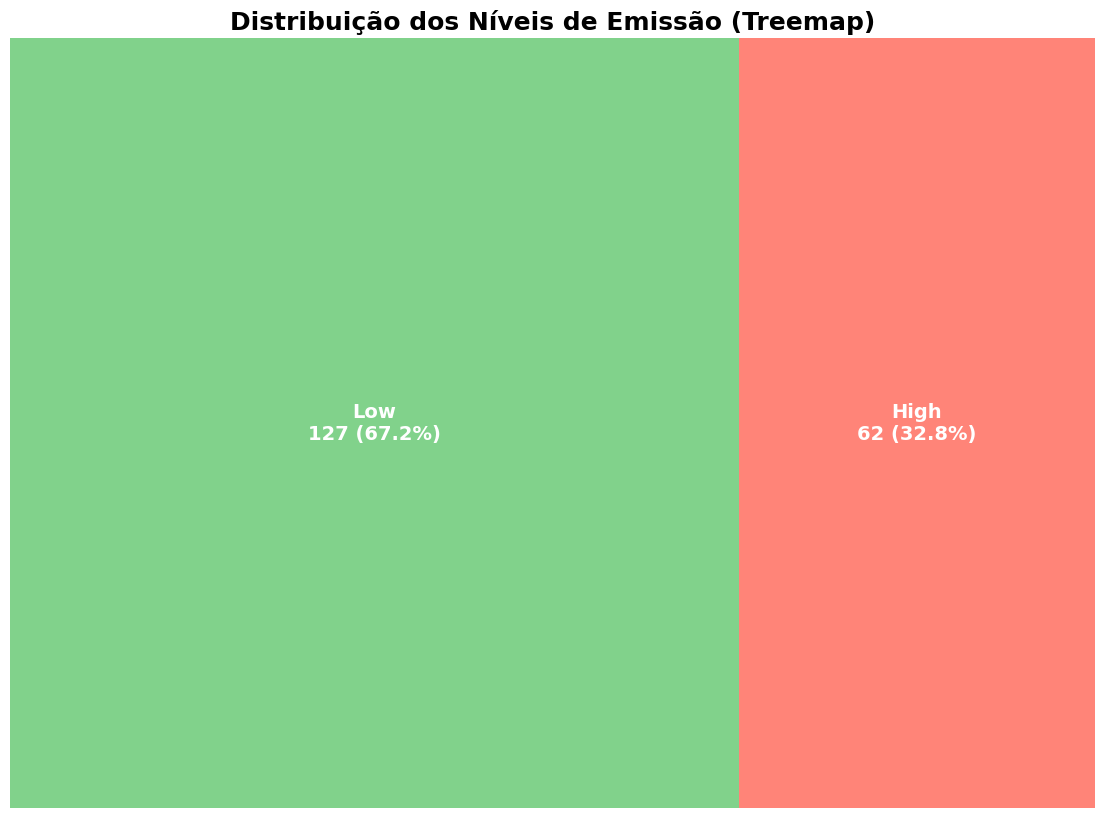

In [83]:
import squarify

emission_levels = classification_data['Emission_Level'].value_counts()
total = emission_levels.sum()
labels = [f"{level}\n{count} ({count/total:.1%})" for level, count in zip(emission_levels.index, emission_levels.values)]
sizes = emission_levels.values

plt.figure(figsize=(14, 10))
squarify.plot(
    sizes=sizes,
    label=labels,
    color=['#6BCB77', '#FF6F61'],
    alpha=0.85,
    text_kwargs={'fontsize': 14, 'weight': 'bold', 'color': 'white'}
)
plt.title("Distribuição dos Níveis de Emissão (Treemap)", fontsize=18, fontweight='bold')
plt.axis('off')
plt.show()


#### Observações:
- O Treemap é ideal para mostrar a proporção entre categorias de forma clara e visualmente impactante.
- As cores contrastantes e os rótulos detalhados tornam o gráfico mais acessível para não especialistas.
- A análise ajuda a identificar se a maioria dos países tem emissões relativamente altas ou baixas, o que pode informar políticas globais de mitigação.
- Esse tipo de visualização também permite explorar como diferentes países contribuem para as emissões globais de CO₂.

---

### Pergunta 9: Quais foram os anos mais marcantes em termos de aumento e redução das emissões globais de CO₂?

#### O que será feito:
1. **Analisar a variação anual**:
   - Calcular a diferença de emissões ano a ano para identificar aumentos ou reduções significativos nas emissões globais de CO₂.
2. **Identificar anos marcantes**:
   - Observar anos com mudanças extremas nas emissões, que podem estar relacionadas a eventos globais, como crises econômicas, políticas climáticas ou avanços tecnológicos.
3. **Visualizar as mudanças anuais**:
   - Criar um gráfico de barras que destaca as variações de emissões ao longo do tempo.
   - Usar uma paleta de cores (`coolwarm`) para diferenciar visualmente aumentos (tons quentes) e reduções (tons frios).

#### Código:

<ipython-input-84-9b09bc4ce0b0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  global_data['Yearly Change'] = global_data['Annual Emissions'].diff()
<ipython-input-84-9b09bc4ce0b0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=global_data, x='Year', y='Yearly Change', palette='coolwarm')


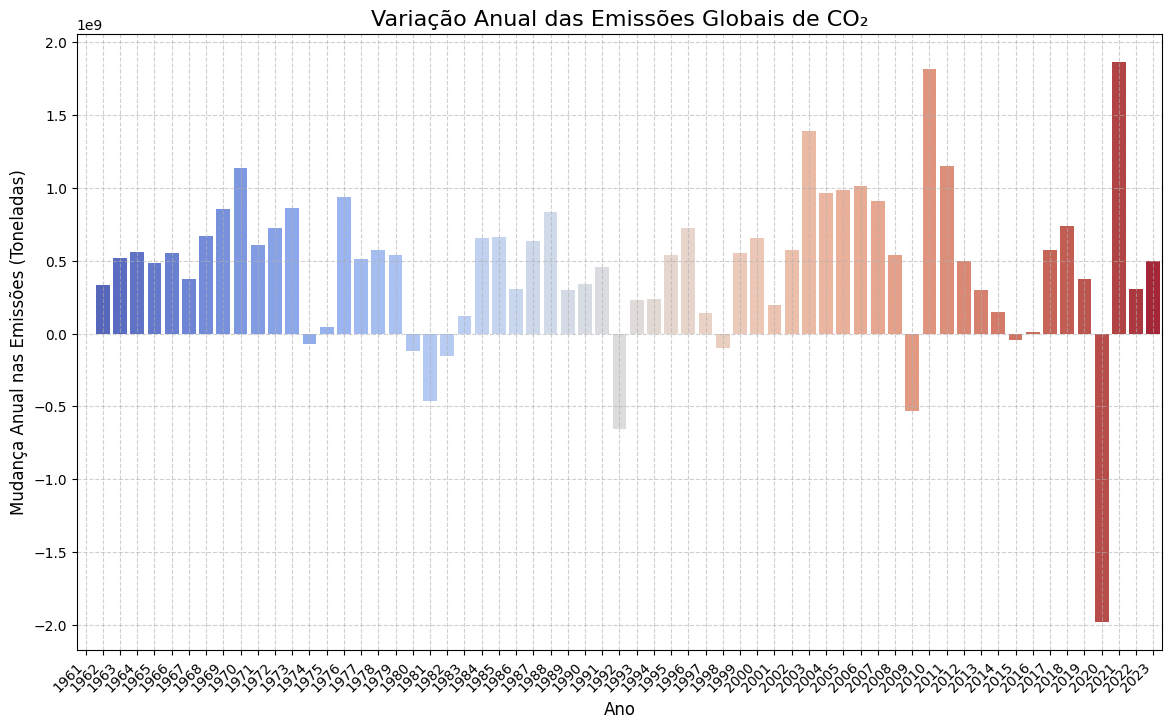

In [84]:
global_data = combined_dataset[combined_dataset['Country'] == 'Global']

global_data['Yearly Change'] = global_data['Annual Emissions'].diff()

plt.figure(figsize=(14, 8))
sns.barplot(data=global_data, x='Year', y='Yearly Change', palette='coolwarm')
plt.title("Variação Anual das Emissões Globais de CO₂", fontsize=16)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Mudança Anual nas Emissões (Toneladas)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


#### Observações:
- O gráfico de barras permite identificar claramente os anos em que ocorreram as maiores mudanças nas emissões globais.
- A rotação dos rótulos no eixo X melhora a legibilidade para anos consecutivos.
- Esta análise pode destacar períodos de transição, como grandes crises econômicas, pandemias, ou o impacto de políticas climáticas globais, como o Protocolo de Kyoto ou o Acordo de Paris.
- Os resultados ajudam a contextualizar as tendências globais e sua relação com eventos históricos.

---

### Pergunta 10: Qual foi o impacto das políticas de mitigação climática nas emissões do Brasil?

#### O que será feito:
1. **Filtrar anos de políticas climáticas**:
   - Identificar os anos em que foram implementadas políticas relevantes de mitigação climática no Brasil.
   - Destacar esses anos no conjunto de dados.
2. **Visualizar emissões totais ao longo do tempo**:
   - Criar um gráfico de área para mostrar a evolução das emissões totais do Brasil ao longo dos anos.
3. **Destaques visuais para anos de políticas**:
   - Usar marcadores vermelhos para identificar os anos em que políticas foram implementadas.
   - Adicionar rótulos com os valores das emissões nesses anos para enfatizar seu impacto.
4. **Melhorar a interpretação**:
   - Incluir rótulos claros nos eixos, uma legenda informativa e uma grade para facilitar a análise.

#### Código:

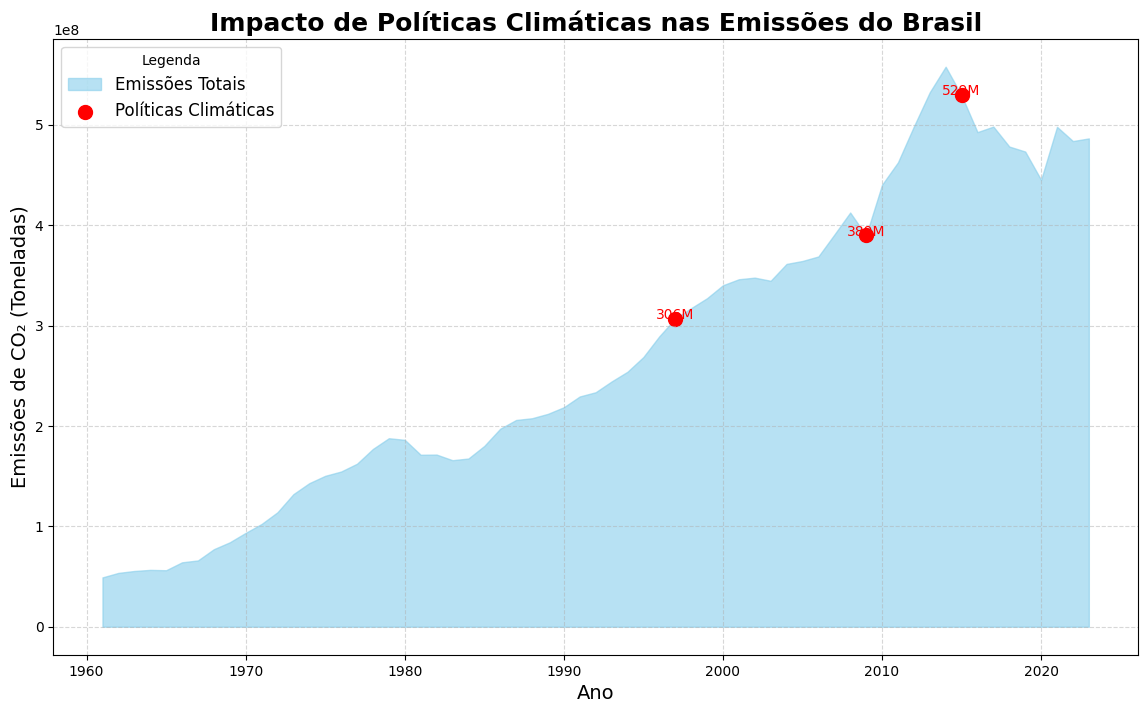

In [88]:
key_years = [1997, 2009, 2015]

brazil_data['Policy Year'] = brazil_data['Year'].apply(lambda x: 1 if x in key_years else 0)

policy_data = brazil_data[brazil_data['Policy Year'] == 1]

plt.figure(figsize=(14, 8))

plt.fill_between(
    brazil_data['Year'],
    brazil_data['Annual Emissions'],
    color='skyblue',
    alpha=0.6,
    label='Emissões Totais'
)

plt.scatter(
    policy_data['Year'],
    policy_data['Annual Emissions'],
    color='red',
    s=100,
    label='Políticas Climáticas'
)

for i, row in policy_data.iterrows():
    plt.text(
        row['Year'],
        row['Annual Emissions'],
        f"{int(row['Annual Emissions'] / 1e6):,}M",
        color='red',
        fontsize=10,
        ha='center'
    )

plt.title("Impacto de Políticas Climáticas nas Emissões do Brasil", fontsize=18, fontweight='bold')
plt.xlabel("Ano", fontsize=14)
plt.ylabel("Emissões de CO₂ (Toneladas)", fontsize=14)

plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=12, title="Legenda", loc='upper left')

plt.show()



#### Observações:
- O gráfico de área mostra claramente como as emissões do Brasil evoluíram ao longo do tempo e como os anos de políticas climáticas se destacam.
- Os marcadores e rótulos tornam evidente o impacto potencial dessas políticas nos níveis de emissões.
- Essa análise ajuda a compreender se as políticas de mitigação tiveram um efeito significativo na redução das emissões ou se outros fatores influenciaram mais fortemente.
- Os resultados podem ser usados para avaliar a eficácia das políticas climáticas no Brasil e orientar decisões futuras.

---

## Conclusão

O estudo apresentou uma análise detalhada das emissões de CO₂, com foco no Brasil, comparando suas emissões com regiões como Estados Unidos, OCDE e o total global. Utilizando técnicas avançadas de visualização e aprendizado de máquina, exploramos questões cruciais relacionadas à evolução, categorização e previsão das emissões.

**Principais Resultados**:
1. O Brasil apresentou um crescimento moderado nas emissões ao longo das décadas, ainda mantendo valores abaixo da média global em grande parte do período analisado.
2. Políticas climáticas implementadas em anos-chave, como 1997, 2009 e 2015, coincidem com estabilizações ou pequenas quedas nas emissões, indicando possíveis impactos positivos.
3. Comparações com países e blocos econômicos destacaram lacunas significativas, como a diferença de emissões entre Brasil e Estados Unidos.
4. Previsões para os próximos 10 anos sugerem um leve aumento nas emissões brasileiras, destacando a importância de medidas adicionais de mitigação.
5. Categorizações mostraram que a maioria dos países se enquadra em níveis baixos de emissões em relação à média global, mas as nações com emissões elevadas dominam as contribuições totais.

Este trabalho ressalta a necessidade de políticas globais mais eficazes e colaborações entre países para mitigar os impactos das mudanças climáticas. Os resultados obtidos são fundamentais para futuras discussões e ações na área ambiental.

---

## Referências

1. **Our World in Data**:  
   - [CO₂ Dataset Sources](https://ourworldindata.org/co2-dataset-sources)  
   - [Annual CO₂ Emissions per Country](https://ourworldindata.org/grapher/annual-co2-emissions-per-country?v=1&csvType=full&useColumnShortNames=false)  

2. **Global Carbon Atlas**:  
   - [Global Carbon Atlas](https://globalcarbonatlas.org/)
   
---

Essas fontes forneceram dados confiáveis e abrangentes sobre as emissões globais de CO₂, essenciais para as análises realizadas neste projeto. Recomenda-se a consulta a essas referências para aprofundamento em temas relacionados.

---